# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(filename, header=0)
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.describe()

,Review,Positive Review
count,1973,1973
unique,1865,2
top,How can a best-selling author like Simon Winch...,False
freq,3,993


In [5]:
df.dtypes

Review             object
Positive Review      bool
dtype: object

In [6]:
# this tells us that there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB


In [7]:
# check for class imbalance
df['Positive Review'].value_counts()

False    993
True     980
Name: Positive Review, dtype: int64

<AxesSubplot:title={'center':'Class Distribution'}>

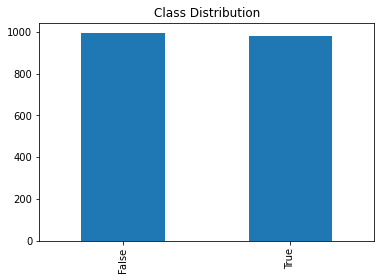

In [8]:
# check for class imbalance visually

# count occurence of each class
class_counts = df['Positive Review'].value_counts()

# visualize class distribution
class_counts.plot(kind='bar', title='Class Distribution')

In [13]:
# explore feature space of text and corpus space

text = df['Review']
doc_lengths = [len(doc) for doc in text]

print("Average document length:", sum(doc_lengths) / len(doc_lengths))
print("Minimum document length:", min(doc_lengths))
print("Maximum document length:", max(doc_lengths))

Average document length: 933.3360364926508
Minimum document length: 59
Maximum document length: 32467


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [14]:
# create features and a label

# label 
y = df['Positive Review'] 

# features
X = df['Review']

# split into training, validation, and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=1234)

In [36]:
# data preparation 
# tokenize data

# create TfidfVectorizer oject
tfidf_vectorizer = TfidfVectorizer()

# fit vectorizer to X_train
tfidf_vectorizer.fit(X_train)

# transform training and test data using the fitted vectorizer
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [37]:
# fit model to training data

# create LogisticRegression model object, fit to the transformed training data
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# make predictions on the transformed test data
probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

# make predictions on the transformed test data 
class_label_predictions = model.predict(X_test_tfidf)

# compute AUC for test data
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

# print size of resulting feature space
len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))

# get glimpse of features
first_five = list(tfidf_vectorizer.vocabulary_.items())[1:5]
print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))


AUC on the test data: 0.9146
The size of the feature space: 18558
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('is', 9043), ('reason', 13533), ('this', 16714), ('book', 2189)]:


In [19]:
# evaluate logistic regression model by varying min_dif values

for min_df in [1,3,5,10,100,500,1000]:
    
    print('\nMin Document Frequency Value: {0}'.format(min_df))
    
    # create TfidfVectorizer oject
    tfidf_vectorizer = TfidfVectorizer(min_df=min_df, ngram_range=(1,2))

    # fit vectorizer to X_train
    tfidf_vectorizer.fit(X_train)

    # transform the training and test data
    X_train_tfidf = tfidf_vectorizer.transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # create a LogisticRegression model object, and fit to the transformed training data
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_tfidf, y_train)
    
    # make predictions on the transformed test data
    probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

    # compute AUC for the test data
    auc = roc_auc_score(y_test, probability_predictions)
    print('AUC on the test data: {:.4f}'.format(auc))

    # compute the size of the resulting feature space
    len_feature_space = len(tfidf_vectorizer.vocabulary_)
    print('The size of the feature space: {0}'.format(len_feature_space))
    
    # get a glimpse of the features
    first_five = list(tfidf_vectorizer.vocabulary_.items())[1:5]
    print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))

    # print the first five stop words
    first_five_stop = list(tfidf_vectorizer.stop_words_)[1:5]
    print('Glimpse of first 5 stop words \n{}:'.format(first_five_stop))
    


Min Document Frequency Value: 1
AUC on the test data: 0.9268
The size of the feature space: 138486
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('is', 61671), ('reason', 97323), ('this', 120815), ('book', 18054)]:
Glimpse of first 5 stop words 
[]:

Min Document Frequency Value: 3
AUC on the test data: 0.9280
The size of the feature space: 17684
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('is', 7641), ('reason', 11976), ('this', 15162), ('book', 2272)]:
Glimpse of first 5 stop words 
['noticeably', 'apartment you', 'future works', 'software black']:

Min Document Frequency Value: 5
AUC on the test data: 0.9277
The size of the feature space: 9140
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('is', 3944), ('reason', 6148), ('this', 7795), ('book', 1116)]:
Glimpse of first 5 stop words 
['noticeably', 'apartment you', 'future works', 'software black']:

Min Document Frequency 

In [22]:
# evaluate logistic regression model by varying BOTH min_df and max_df values

min_df_values = [1,3,100,1000]
max_df_values = [0.5, 0.7, 0.9, 1.0]

for min_df in min_df_values:
    for max_df in max_df_values:
    
        print('\nMin Document Frequency Value: {0}'.format(min_df))
        print('\nMax Document Frequency Value: {0}'.format(max_df))

        # create TfidfVectorizer oject
        tfidf_vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=(1,2))

        # fit vectorizer to X_train
        tfidf_vectorizer.fit(X_train)

        # transform training and test data
        X_train_tfidf = tfidf_vectorizer.transform(X_train)
        X_test_tfidf = tfidf_vectorizer.transform(X_test)

        # create a LogisticRegression model object, fit model to the transformed training data
        model = LogisticRegression(max_iter=200)
        model.fit(X_train_tfidf, y_train)

        # make predictions on the transformed test data
        probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

        # compute the AUC for test data
        auc = roc_auc_score(y_test, probability_predictions)
        print('AUC on the test data: {:.4f}'.format(auc))

        # compute the size of the resulting feature space
        len_feature_space = len(tfidf_vectorizer.vocabulary_)
        print('The size of the feature space: {0}'.format(len_feature_space))

        # get a glimpse of the features
        first_five = list(tfidf_vectorizer.vocabulary_.items())[1:5]
        print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))

        # print the first five stop words
        first_five_stop = list(tfidf_vectorizer.stop_words_)[1:5]
        print('Glimpse of first 5 stop words \n{}:'.format(first_five_stop))




Min Document Frequency Value: 1

Max Document Frequency Value: 0.5
AUC on the test data: 0.9263
The size of the feature space: 138471
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('reason', 97314), ('has', 51655), ('sold', 107012), ('over', 87204)]:
Glimpse of first 5 stop words 
['book', 'with', 'and', 'to']:

Min Document Frequency Value: 1

Max Document Frequency Value: 0.7
AUC on the test data: 0.9269
The size of the feature space: 138477
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('reason', 97317), ('has', 51657), ('sold', 107015), ('over', 87207)]:
Glimpse of first 5 stop words 
['book', 'and', 'to', 'in']:

Min Document Frequency Value: 1

Max Document Frequency Value: 0.9
AUC on the test data: 0.9269
The size of the feature space: 138485
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('is', 61671), ('reason', 97323), ('this', 120814), ('book', 18054)]:
Glimpse of firs

ValueError: max_df corresponds to < documents than min_df

# Analysis 

After varying both the min_df value and max_df value and testing the different combinations, I found that the value of 3 for min_df and 0.7 for max_df provided the best AUC: 0.9301. The AUC measures the ability of a binary classifier to distinguish between classes. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. In this case, this specific combination of min_df and max_df resulted in an AUC of 0.9301 which indicates that the model is able to distinguish between the positive and negative book reviews. 

In [38]:
# improve the model with best min_df and max_df values (same steps as previous)

print('\nMin Document Frequency Value: {0}'.format(min_df))

tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.7, ngram_range=(1,2))

tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)
    
probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))
   
len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))
    
first_five = list(tfidf_vectorizer.vocabulary_.items())[1:5]
print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))

first_five_stop = list(tfidf_vectorizer.stop_words_)[1:5]
print('Glimpse of first 5 stop words \n{}:'.format(first_five_stop))


Min Document Frequency Value: 1000
AUC on the test data: 0.9301
The size of the feature space: 17675
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('reason', 11970), ('has', 6293), ('sold', 13062), ('over', 10839)]:
Glimpse of first 5 stop words 
['noticeably', 'apartment you', 'future works', 'software black']:


In [39]:
# make predictions with the model

probability_predictions = model.predict(X_test_tfidf.toarray())

print("Predictions for the first 15 examples:")
print("Probability\t\t\tClass")
for i in range(0,15):
    if probability_predictions[i] >= .5:
        class_pred = "Good Review"
    else:
        class_pred = "Bad Review"
    print(str(probability_predictions[i]) + "\t\t\t" + str(class_pred))

Predictions for the first 15 examples:
Probability			Class
True			Good Review
True			Good Review
False			Bad Review
True			Good Review
True			Good Review
False			Bad Review
False			Bad Review
False			Bad Review
True			Good Review
True			Good Review
True			Good Review
False			Bad Review
True			Good Review
True			Good Review
True			Good Review


In [40]:
# check an actual review

print('Review #1:\n')
print(X_test.to_numpy()[100])

goodReview = True if probability_predictions[100] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[100]))

Review #1:

This classic chronicle of Presidential campaigns, from the get-go to contemporary times, has the unusual virtue of being useful either as a collection of short readable chapters - each just the right size for a daily bus or train ride - or as a reference source. Reading this in the wake of Monicagate and the Florida Recount, it's instructive to read the history of Grover Cleveland, who seems to have features of BOTH past Democratic candidates. Like Clinton, he had his scandals - fathering an illegitimate child. Like Gore, his career was rudely interrupted by an election which he won on popular votes but lost, in a hotly contested, knife-edge electoral college tally


Prediction: Is this a good review? True

Actual: Is this a good review? True



# Results
After checking different reviews, the model seems to accurately predict the sentiment of the review for the majority of the time.